In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from skimage.transform import resize
import pandas as pd
from nilearn.image import resample_img, get_data
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import minmax_scale

In [113]:
def get_maps(reference):

    if reference == "LRP":
        data = "ori"
        mod = "ALL"
        folder = "/MRI_experiment/"+ data +"/model0/"
        img = nib.load(reference + folder + 'av_' + mod+ '.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG":
        data = "ori"
        mod = "ALL"
        folder = "/MRI_experiment/"+ data +"/model0/"
        img = nib.load(reference + folder + 'av_' + mod+ '.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "GGC":
        folder = "/MRI_experiment/ori/model0/"
        img = nib.load(reference + folder + 'av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "LRP_s2":
        img = nib.load('LRP/MRI_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "LRP_s3":
        img = nib.load('LRP/MRI_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "LRP_s4":
        img = nib.load('LRP/MRI_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "IG_s2":
        img = nib.load('IG/MRI_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG_s3":
        img = nib.load('IG/MRI_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG_s4":
        img = nib.load('IG/MRI_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "GGC_s2":
        img = nib.load('GGC/MRI_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "GGC_s3":
        img = nib.load('GGC/MRI_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "GGC_s4":
        img = nib.load('GGC/MRI_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
#     elif reference == "SVM_coef":
#         relvence =np.load(r'C:\Users\jieyo\Desktop\svm\SVM_coef.npy')
#         relvence = np.flip(relvence,1)
#         relvence = -1 * relvence
#     elif reference == "LR_coef":
#         relvence =np.load(r'C:\Users\jieyo\Desktop\svm\LR_coef.npy')
#         relvence = np.flip(relvence,1)
#         relvence = -1 * relvence
    return relvence

In [7]:
def get_mask(reference):
    if reference =="meta":
        ale_ori6 = nib.load(r'rois/ADMCI_VBM_6.nii.gz')
        ale_ori6 = ale_ori6.get_fdata()
        ale_ori6 = np.squeeze(ale_ori6,3)
        print(ale_ori6.shape)
        ale_ori = ale_ori6

    return ale_ori

In [5]:
img = nib.load("mni_icbm152_t1_tal_nlin_asym_09c_mask.nii")
mask = img.get_fdata()

In [5]:
# ale_ori=get_mask("vbm_s6")

In [30]:
av_ALL = get_maps("GGC") 
ale_ori = get_mask("meta")

(193, 229, 193)


In [72]:
def get_brain(av_ALL):
    mask[mask == 0] = 'nan'
    rr = np.multiply(av_ALL,mask)
    zz = np.multiply(ale_ori,mask)

    print(f"brain: {np.count_nonzero(~np.isnan(mask))}")
    print(f"relevence brain: {np.count_nonzero(~np.isnan(rr))}")
    print(f"z score brain: {np.count_nonzero(~np.isnan(zz))}")
    return rr


In [74]:
def plot3(x,y,z, name):
    fig, [[ax1, ax2, ax22],[ax3, ax4, ax44],[ax5, ax6,ax66]] = plt.subplots\
                              (nrows=3, ncols=3, constrained_layout=True, figsize=(6,6))
    # plt.subplots_adjust(left = 0.5)

    i = 65
    j = 100
    k = 110
    color = "Reds"

    a = x[:,:,i]
    b = y[:,:,i]
    c = z[:,:,i]
    ax1.imshow(a, cmap=color, interpolation="gaussian")
    ax2.imshow(b, cmap=color, interpolation="gaussian")
    ax22.imshow(c, cmap=color, interpolation="gaussian")

    a = x[:,j,:]
    b = y[:,j,:]
    c = z[:,j,:]
    ax3.imshow(a, cmap=color, interpolation="gaussian")
    ax4.imshow(b, cmap=color, interpolation="gaussian")
    ax44.imshow(c, cmap=color, interpolation="gaussian")


    a = x[k,:,:]
    b = y[k,:,:]
    c = z[k,:,:]
    ax5.imshow(a, cmap=color, interpolation="gaussian")
    ax6.imshow(b, cmap=color, interpolation="gaussian")
    ax66.imshow(c, cmap=color, interpolation="gaussian")

    ax5.set_xlabel(name)
    ax6.set_xlabel('meta')
    ax66.set_xlabel('mask')

In [108]:
def plot5(x,x1,x2,y,z, name,name1,name2):
    fig, [[ax1,ax11,ax12, ax2, ax22],[ax3,ax31,ax32, ax4, ax44],[ax5,ax51,ax52, ax6,ax66]] = plt.subplots\
                              (nrows=3, ncols=5,figsize=(10,10))
    plt.subplots_adjust(hspace = 0)
#     fig.tight_layout()

    i = 65
    j = 100
    k = 110
    color = "Reds"

    a = x[:,:,i]
    a1 = x1[:,:,i]
    a2 = x2[:,:,i]
    b = y[:,:,i]
    c = z[:,:,i]

    ax1.imshow(a, cmap=color, interpolation="gaussian")
    ax11.imshow(a1, cmap=color, interpolation="gaussian")
    ax12.imshow(a1, cmap=color, interpolation="gaussian")
    ax2.imshow(b, cmap=color, interpolation="gaussian")
    ax22.imshow(c, cmap=color, interpolation="gaussian")

    a = x[:,j,:]
    a1 = x1[:,j,:]
    a2 = x2[:,j,:]
    b = y[:,j,:]
    c = z[:,j,:]
    ax3.imshow(a, cmap=color, interpolation="gaussian")
    ax31.imshow(a1, cmap=color, interpolation="gaussian")
    ax32.imshow(a2, cmap=color, interpolation="gaussian")
    ax4.imshow(b, cmap=color, interpolation="gaussian")
    ax44.imshow(c, cmap=color, interpolation="gaussian")

    a = x[k,:,:]
    a1 = x1[k,:,:]
    a2 = x2[k,:,:]
    b = y[k,:,:]
    c = z[k,:,:]
    ax5.imshow(a, cmap=color, interpolation="gaussian")
    ax51.imshow(a1, cmap=color, interpolation="gaussian")
    ax52.imshow(a2, cmap=color, interpolation="gaussian")
    ax6.imshow(b, cmap=color, interpolation="gaussian")
    ax66.imshow(c, cmap=color, interpolation="gaussian")

    ax5.set_xlabel(name)
    ax51.set_xlabel(name1)
    ax52.set_xlabel(name2)
    ax6.set_xlabel('meta')
    ax66.set_xlabel('mask')

brain: 1886574
relevence brain: 1886574
z score brain: 1886574
brain: 1886574
relevence brain: 1886574
z score brain: 1886574
brain: 1886574
relevence brain: 1886574
z score brain: 1886574
(193, 229, 193)


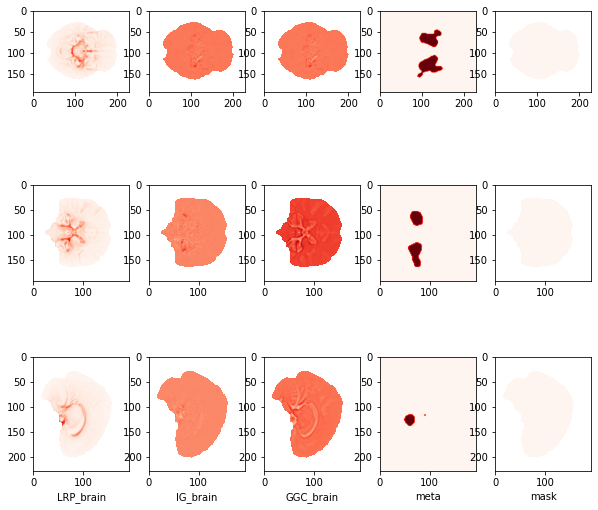

In [109]:
brain = get_brain(get_maps("LRP"))
brain1 = get_brain(get_maps("IG"))
brain2 = get_brain(get_maps("GGC"))
plot5(brain,brain1,brain2, get_mask("meta"), mask, "LRP_brain","IG_brain", "GGC_brain")

In [114]:
##############################################
############## MRI vs meta ###################
##############################################
all_fpr = {}
all_tpr = {}
all_roc_auc = {}

for method in ["LRP", "LRP_s2", "LRP_s3", "LRP_s4", \
               "IG", "IG_s2", "IG_s3", "IG_s4",\
               "GGC", "GGC_s2", "GGC_s3", "GGC_s4"]:

    av_ALL = get_maps(method)
    ale_ori=get_mask("meta")

    mask[mask == 0] = 'nan'
    rr = np.multiply(av_ALL,mask)
    zz = np.multiply(ale_ori,mask)

    r_flat = rr.flatten() 
    z_flat = zz.flatten() 

    r_flat_brain = r_flat[~np.isnan(r_flat)]
    z_flat_brain = z_flat[~np.isnan(z_flat)]

    z_flat_brain[z_flat_brain > 1] = 1

    fpr, tpr, _ = roc_curve(z_flat_brain,r_flat_brain)
    all_fpr[method] = fpr
    all_tpr[method] = tpr
    roc_auc1 = auc(fpr,tpr)
    all_roc_auc[method] = roc_auc1
    

(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)


C:\Users\jieyo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


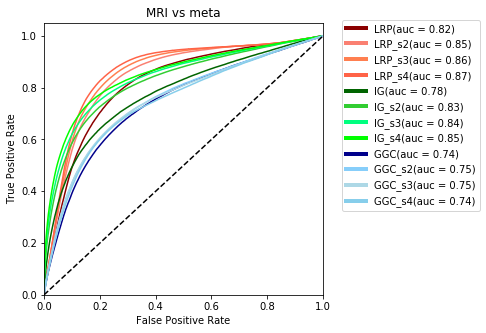

In [115]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.plot(all_fpr['vbm_s6'], all_tpr['vbm_s6'],"black", label='vbm_s6(auc = %0.2f)' % all_roc_auc['vbm_s6'])
# ax.plot(all_fpr['vbm_s8'], all_tpr['vbm_s8'],"grey",label='vbm_s8(auc = %0.2f)' % all_roc_auc['vbm_s8'])
# ax.plot(all_fpr['vbm_s10'], all_tpr['vbm_s10'],"silver", label='vbm_s10(auc = %0.2f)' % all_roc_auc['vbm_s10'])
# ax.plot(all_fpr['vbm_s12'], all_tpr['vbm_s12'], "lightgrey",label='vbm_s12(auc = %0.2f)' % all_roc_auc['vbm_s12'])

ax.plot(all_fpr['LRP'], all_tpr['LRP'],"darkred", label='LRP(auc = %0.2f)' % all_roc_auc['LRP'])
ax.plot(all_fpr['LRP_s2'], all_tpr['LRP_s2'], "salmon", label='LRP_s2(auc = %0.2f)' % all_roc_auc['LRP_s2'])
ax.plot(all_fpr['LRP_s3'], all_tpr['LRP_s3'],"coral", label='LRP_s3(auc = %0.2f)' % all_roc_auc['LRP_s3'])
ax.plot(all_fpr['LRP_s4'], all_tpr['LRP_s4'],"tomato", label='LRP_s4(auc = %0.2f)' % all_roc_auc['LRP_s4'])

ax.plot(all_fpr['IG'], all_tpr['IG'],"darkgreen", label='IG(auc = %0.2f)' % all_roc_auc['IG'])
ax.plot(all_fpr['IG_s2'], all_tpr['IG_s2'],"limegreen", label='IG_s2(auc = %0.2f)' % all_roc_auc['IG_s2'])
ax.plot(all_fpr['IG_s3'], all_tpr['IG_s3'],"springgreen", label='IG_s3(auc = %0.2f)' % all_roc_auc['IG_s3'])
ax.plot(all_fpr['IG_s4'], all_tpr['IG_s4'],"lime", label='IG_s4(auc = %0.2f)' % all_roc_auc['IG_s4'])

ax.plot(all_fpr['GGC'], all_tpr['GGC'],"darkblue", label='GGC(auc = %0.2f)' % all_roc_auc['GGC'])
ax.plot(all_fpr['GGC_s2'], all_tpr['GGC_s2'],"lightskyblue", label='GGC_s2(auc = %0.2f)' % all_roc_auc['GGC_s2'])
ax.plot(all_fpr['GGC_s3'], all_tpr['GGC_s3'],"lightblue", label='GGC_s3(auc = %0.2f)' % all_roc_auc['GGC_s3'])
ax.plot(all_fpr['GGC_s4'], all_tpr['GGC_s4'],"skyblue", label='GGC_s4(auc = %0.2f)' % all_roc_auc['GGC_s4'])

# ax.plot(all_fpr['SVM_coef'], all_tpr['SVM_coef'],"purple", label='SVM_coef(auc = %0.2f)' % all_roc_auc['SVM_coef'])
# ax.plot(all_fpr['LR_coef'], all_tpr['LR_coef'],"violet", label='LR_coef(auc = %0.2f)' % all_roc_auc['LR_coef'])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("MRI vs meta")
# ax.legend(loc="best")
leg = ax.legend( bbox_to_anchor=(1.05, 1.03))

for line in leg.get_lines():
    line.set_linewidth(4.0)

In [43]:
img = nib.load('rois/ADMCI_CMRglu_6.nii.gz')
img_np = img.get_fdata()
img_affine = img.affine
img = nib.load('rois/ADMCI_CMRglu_6.nii.gz')
roi = np.array(img.dataobj)
roi = roi.squeeze()
print(roi.shape)

(193, 229, 193)


In [54]:
def save_t(x, name):
    vmax_all = 100
    vmin_all = 99
    vmin_all_t, vmax_all_t = np.percentile(x, vmin_all), np.percentile(x, vmax_all)
    print(vmin_all_t,vmax_all_t)
    x_t = np.array(x)
    x_t[x_t < vmin_all_t] = 0
    x_t[x_t >= vmin_all_t] = 1
    print(x_t.shape)
    new_image = nib.Nifti1Image(x_t, affine=img_affine)
    nib.save(new_image, name + ".nii") 

In [57]:
save_t(get_maps("IG"), "mri_ig")

3.0611406659834586e-05 0.0011493683194712786
(193, 229, 193)
